르네상스 테크놀로지의 Peter Brown은 이전에 IBM에서 일하다가 NLP를 적용하여 가장 성공한 계량적으로 헤지 펀드를 운용한 사람이다. 요즘 가장 중요한 정보는 쓰여지거나 말해지는 언어이다. 금융 전문가들에게 대부분의 시간을 어디에 쓰는지 물어보면, 대부분의 시간을 읽는데 쓴다는 것을 알 수 있다. 다양한 애널리스트들의 리포트를 포함하여 헤드라인 등 많은 데이터들이 포함된다. 이러한 정보를 자동으로 처리하면 트레이딩 속도를 높일 수 있고 트레이딩을 위해 다양한 정보를 쓸 수 있으면 전반적으로 비용을 줄일 수 있다.

NLP는 금융 분야에 들어왓다. 예를 들면, 보험 회사들은 고객 claim을 자동으로 처리한다. 텍스트에 대한 이해로 금융 분야에 머신러닝을 적용 것이 기본이 되고 있다. 

역사적으로 NLP는 전통적으로 언어학자들에 의해 손수 만들어진 규칙에 의존했다. 언어학자는 신경망에 의해 대체되고 있다.

이번 챕터에서는 케라스에서 어떻게 파워풀한 NLP모델을 만드는지 알아볼 것이며 spaCy NLP 라이브러리에 대해서도 알아볼 것 이다.

### An introductory guide to spaCy

spaCy의 Doc과 Vocab 클래스로 구성되어 있다. Doc 인스턴스는 하나의 도큐먼트, 텍스트, 토크아니징된 버전, 그리고 개체명이 포함되어 있다. Vocab은 도큐먼트 사이에서 찾을 수 있는 정보를 담고 있다. 

spaCy는 NLP에 필요한 많은 파이프라인 features에 유용하다. 처음엔 추상적으로 들릴 수 있지만, 다양한 태스크를 다뤄보면 이해할 수 있다.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [4]:
a1 = pd.read_csv('../input/articles1.csv',index_col=0)
a2 = pd.read_csv('../input/articles2.csv',index_col=0)
a3 = pd.read_csv('../input/articles3.csv',index_col=0)

In [5]:
df = pd.concat([a1, a2, a3])

In [6]:
del a1, a2, a3

In [12]:
df

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b..."
6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...
7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz..."
8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...


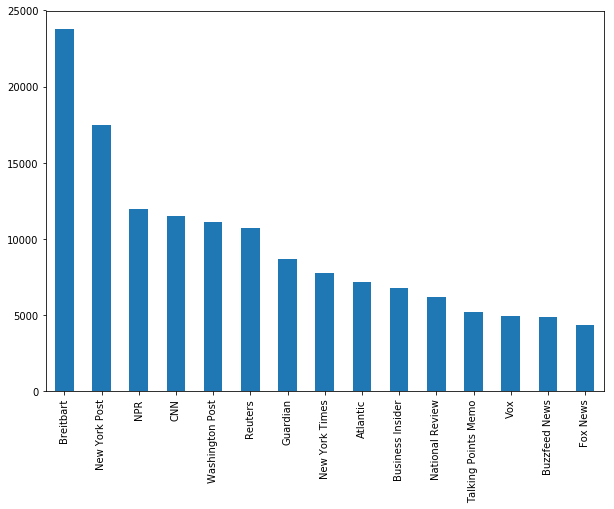

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
df.publication.value_counts().plot(kind='bar')

데이터에서 기사의 내용을 가져온다.

### Named entity recognition

Named entity recognition(NER)은 텍스트가 무엇을 업급하는지 나타내는 것이다. 

In [20]:
import spacy
from spacy import displacy
nlp = spacy.load('en')

text = df.loc[0,'content']

In [21]:
doc = nlp(text)

In [22]:
print(doc)

WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been d

spaCy의 가장 우수한 특징 중 하나는 visualizer인 displacy인데 텍스트의 named entity를 텍스트 상에서 보여준다. 

In [23]:
displacy.render(doc, style = 'ent', jupyter = True)

기존에 학습된 데이터를 가지고 신경망에 의해 태깅이 된다. 이것을 목적에 맞게 fine-tune한 태깅 모델이 필요하다. 

In [24]:
nlp = spacy.load('en',
                 disable=['parser', 
                          'tagger',
                          'textcat'])

organizations이 무엇에 대해 썼는지 알기 위해, NER만 건져내는 새로운 파이프라인을 만들어 실행이 더 빠르게 되도록 한다.

In [29]:
from tqdm import tqdm, tqdm_notebook

frames = []
for i in tqdm_notebook(range(1000)):
    doc = df.loc[i,'content']
    text_id = df.loc[i,'id']
    doc = nlp(doc)
    ents = [(e.text, e.start_char, e.end_char, e.label_) 
            for e in doc.ents 
            if len(e.text.strip(' -—')) > 0]
    frame = pd.DataFrame(ents)
    frame['id'] = text_id
    frames.append(frame)

In [30]:
npf = pd.concat(frames)

In [31]:
npf.head()

,0,1,2,3,id
0,WASHINGTON,0,10,GPE,17283
1,Republicans,30,41,NORP,17283
2,Obama,116,121,PERSON,17283
3,Trump,167,172,ORG,17283
4,billions of dollars,317,336,MONEY,17283


In [32]:
npf.columns = ['Text','Start','Stop','Type','id']

entity 타입의 분포를 plot해보면 아래와 같다.

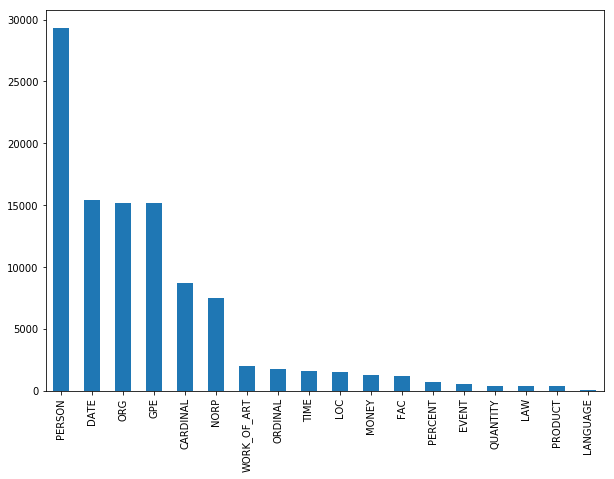

In [34]:
plt.figure(figsize=(10,7))
npf.Type.value_counts().plot(kind='bar')

ORG에서 상위 빈도수 기준으로 상위 15의 organizations을 보면 아래와 같다.

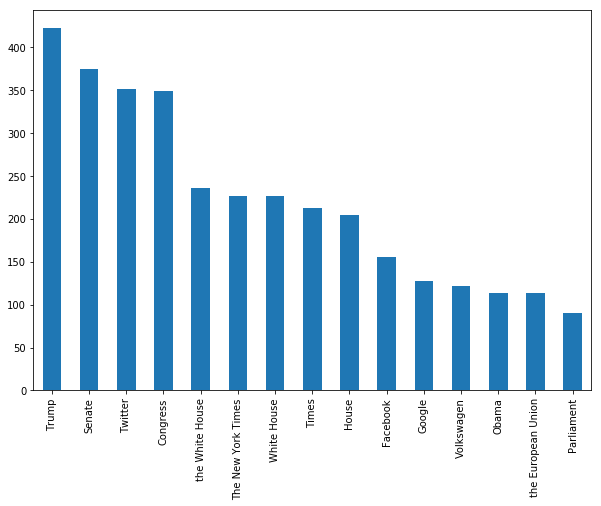

In [35]:
orgs = npf[npf.Type == 'ORG']

plt.figure(figsize=(10,7))
orgs.Text.value_counts()[:15].plot(kind='bar')

사전에 학습된 NER 모델을 통해 NLP의 많고 흔한 문제를 해결할 수 있다. 예를 들어, 뉴욕 타임즈는 워싱턴 포스트나나 다른 것 보다 entity로 더 자주 언급 되는 것인지 볼 수 있다.

### Fine-tuning the NER

사전에 학습된 NER은 특정 텍스트에서 잘 수행되지 않읋 수 있다. 이를 해결하기 위해, fine-tune NER model이 필요하다. 

트레이닝 데이터는 아래와 같다.

In [36]:
TRAIN_DATA = [
    ('Who is Shaka Khan?', {
        'entities': [(7, 17, 'PERSON')]
    }),
    ('I like London and Berlin.', {
        'entities': [(7, 13, 'LOC'), (18, 24, 'LOC')]
    })
]

In [37]:
nlp = spacy.load('en')

기존에 있는 모델을 읽으려면, 아래와 같이 실행하면 된다.

In [38]:
if 'ner' not in nlp.pipe_names:
    ner = nlp.create_pipe('ner')
    nlp.add_pipe(ner, last=True)
else:
    ner = nlp.get_pipe('ner')

다음으로 NER이 우리가 가진 Label을 인식할 수 있는지 확인하는 것이다. 새로운 개체명 타입이 데이터에 포함되어 있다면, add_label 함수로 label type을 NER에 추가할 수 있다.

아래의 코드로 추가할 수 있다.

In [39]:
for _, annotations in TRAIN_DATA:
    for ent in annotations.get('entities'):
        ner.add_label(ent[2])

In [40]:
import random

In [44]:
TRAIN_DATA[0][1].get('entities')

[(7, 17, 'PERSON')]

In [48]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [49]:
n_iter = 5

# 트레이닝 하는 동안 다른 pipe를 이용하지 않기 위해 가져온다.
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']

with nlp.disable_pipes(*other_pipes):  # only train NER
    optimizer = nlp._optimizer 
    if not nlp._optimizer:
        optimizer = nlp.begin_training()
    
    for itn in range(n_iter):
        random.shuffle(TRAIN_DATA)
        losses = {}
        for text, annotations in TRAIN_DATA:
            nlp.update(
                [text],  # 텍스트의 배치
                [annotations],  # annotations의 배치
                drop=0.5,  # dropout - 데이터를 기억하기 어렵게 만들기 위해 
                sgd=optimizer,  # 가중치 업데이트
                losses=losses)
        print(losses)

{'ner': 4.472651773932038}
{'ner': 5.256316780531009}
{'ner': 7.497757661861193}
{'ner': 5.9527950310668984}
{'ner': 5.925831200949467}


### Part of speech(POS)(품사) tagging

2017년 10월 10일 화요일 9:34에서 9:36분 사이 다우 존스 newswire는 기술적인 에러가 발생하여 이상한 헤드라인을 포스팅하였다. 그 중 하나는 구글이 애플을 산다는 것이었다. 이 4글자가 애플 주식을 2퍼센트 오르게 만들었다. 알고리즘 트레이딩 시스템은 이러한 상황을 인식하지 못한다. 

한가지 의문이 생기는데 왜 트레이딩 시스템이 이 4글자에 의존하여 주식을 사게 만들었을까? 그에 대한 해답은 Part of speech tagging(POS tagging)이다. POS tagging은 단어가 어떠한 기능을 가지고 있는지 그리고 단어가 서로 어떻게 관련이 있는지 이해할 수 있다. 

spaCy는 사전에 학습된 POS tagger를 제공한다. 이번에는 구글/애플 뉴스 스토리에 적용해보자 한다. 

In [2]:
import spacy
from spacy import displacy
nlp = spacy.load('en')

In [3]:
nlp = spacy.load('en')
doc = 'Google to buy apple'
doc = nlp(doc)

for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text)

Google Google ROOT Google
apple apple dobj buy


이 문장에서 구글은 문장의 root이다. 반면에 애플은 문장의 객체이다. 동사 buy는 애플에 적용된다. 

### Rule-based matching

딥러닝과 통계적 모델을 살피기에 앞서, 규칙기반의 NLP에 대해서 알아본다. 아직 룰 베이스 기반의 시스템이 사라졌다고 절대 말할 수 없다. 세팅하기 쉽고 간단한 태스크를 다룰 때 잘 작동한다.

만약 텍스트에서 구글에 대한 언급을 찾고자 한다면, 개체명 인식으로 해야할까? 만약 그렇게 한다면, 모든 텍스트를 신경망에 넣고 개체명 텍스트에서 구글을 찾야 할 것이다. 만약 구글이라는 글자가 들어간 텍스트를 찾는게 훨씬 좋지 않을까? 

아래의 코드로 간단한 룰 베이스 매칭을 해본다.

In [4]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en')
matcher = Matcher(nlp.vocab)

matcher는 패턴을 찾는데 패턴은 사전의 리스트로 되어 있다. 토큰 바이 토큰으로 작동한다. 즉 단어마다 이뤄진다. hello world라는 문구를 찾는다면, 아래와 같이 정의한다.

In [5]:
pattern = [{'LOWER': 'hello'}, {'IS_PUNCT': True}, {'LOWER': 'world'}]

LOWER 속성은 단어 두개가 소문자로 변환되는지 확인한다. 만약 Hello, HELLO가 있다면 조건을 충족한다. 두번쨰 토큰은 콤마를 확인한다. 그래서 hello! world 또는 hello, world 모두를 만족한다. 그러나 hello world는 만족하지 않는다. 

In [6]:
matcher.add('HelloWorld', None, pattern)

In [7]:
doc = nlp(u'Hello, world! Hello world!')
matches = matcher(doc)

In [8]:
matches

[(15578876784678163569, 0, 3)]

In [9]:
doc[0:3]

Hello, world

In [10]:
doc[0]

Hello

In [11]:
doc[1]

,

In [12]:
doc[2]

world

In [13]:
type(nlp)

spacy.lang.en.English

### Adding custom functions to matchers

이제 더 복잡한 경우를 따져보자. iPhone이라는 단어를 보면 제품이라는 것을 알지만 신경망을 기반으로 한 matcher는 종종 기업으로 분류한다. 그 이유는 iPhone이라는 단어가 기업과 비슷한 문맥에서 사용되기 때문이다. 

iPhone는 묻지도 따지지도 않고 제품 개체라고 판단하는 규칙 기반의 matcher를 만들어 보자.

먼저 word PRODUCT의 해시값을 얻어야 한다. spaCy의 word는 해시값으로 고유하게 구분된다. 개체 타입도 그것의 해시값에 의해 식별된다. 제품 타입의 개체명을 세팅하기 위해, 개체명을 위한 해시값을 제공해야 한다. 

언어 모델의 사전을 아래의 코드로 얻을 수 있다.

In [14]:
PRODUCT = nlp.vocab.strings['PRODUCT']

그 다음 on_match RULE을 정의할 필요가 있다. 

In [15]:
def add_product_ent(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    doc.ents += ((PRODUCT, start, end),)

In [16]:
pattern1 = [{'LOWER': 'iphone'}]
pattern2 = [{'ORTH': 'iPhone'}, {'IS_DIGIT': True}]

matcher.add('iPhone', add_product_ent,pattern1, pattern2)

In [27]:
matches = matcher(doc)

### Regular expressions

regexes는 규칙 기반 매칭의 파워풀한 형태이다. regexes는 패턴을 찾는 것을 도와준다. 예를 들어, [a-z]. 이라고 하면 .뒤에 어떠한 소문자가 오든지 찾아낸다. 

regexes 패턴은 매우 민감하기 때문에 대문자만 캡쳐할 수도 있다. 그리고 스펠링의 빈도수가 달라도 특별히 지정해주면 특정 케이스를 찾아낼 수 있다. 

수도 찾아낸다. 

### Using Python's regex module

파이썬 내장 정규식 모둘은 re이다. 

In [28]:
import re

만약 회사의 VAT 숫자를 찾고 싶을 경우, 아래와 같이 하면 된다.

In [29]:
pattern = 'NL[0-9]{9}B[0-9]{2}'

In [30]:
my_string = 'ING Bank N.V BTW:NL003028112B01'

In [31]:
re.findall(pattern, my_string)

['NL003028112B01']

In [33]:
re.findall(pattern, my_string, flags=re.IGNORECASE)

['NL003028112B01']

In [34]:
match = re.search(pattern,my_string)

In [36]:
match.span()

(17, 31)

In [38]:
my_string[17:31]

'NL003028112B01'

### Regex in pandas

NLP 문제를 위한 데이터는 pandas 데이터 프레임에서 볼 수 있다. pandas는 regex를 지원한다. 

### A text classification task

NLP의 가장 흔한 태스크는 텍스트 분류이다. 보통의 경우 감성 분석이다. 트위터 데이터를 이용해서 재앙이 발생하는지 아닌지 구분해보도록 한다. 

오늘날 트위터에서 많은 정보를 얻는 기술들이 있다. 트위터는 뉴스보다 더 빠르다. 예를 들어 화재나 홍수와 같은 것들에 대한 정보에 대한 것을 말한다. 이번 섹션에서는 이벤트 기반 트레이딩 전략을 만들어 보도록 하겠다.

그러나 모든 재앙과 관련된 트윗이 실질적으로 재앙을 의미하진 않는다. 

이번 태스크의 목표는 관련없는 트윗들 중에서 진짜 관련된 트윗을 분리하는 분류 모델을 만들고자 한다. 

### Preparing the data

현실 문제에서 텍스트 데이터의 크기는 엄청 크기 때문에 간단한 스케일링 연산으로 다루기 힘들 수 있다. 예를 들면, 사람들은 가끔 괴상한 데이터를 텍스트에 넣기도 한다. NLP 작업은 이러한 데이터에 대한 전처리가 필요하다.

### Sanitizing charaters

텍스트를 저장려면, 컴퓨터는 문자를 비트로 인코딩해야 한다. 몇가지 방법이 있는데 전부 다루진 않겠다.
UTF-8이 인코딩에 최적이기 한데, 항상 잘되는 것은 아니다. 어떤 글자는 인코딩할 수 없을 수도 있다. 그래서 이러한 텍스트는 없애버려야 한다.

파이썬은 codecs라는 다른 인코딩들을 잘 다룰 수 있는 라이브러리를 제공한다. 우리의 데이터가 UTF-8로 인코딩된다면, 아주 조금의 특수한 문자는 잘 안될 수 있다. 그러기 떄문에, 아래의 코드를 통해 문자를 살균해버리자.

In [39]:
import codecs

input_file = codecs.open('clean_socialmedia-disaster.csv', 'r', encoding='utf-8', errors='replace')

파일을 읽어 드리면 for문으로 라인별로 읽어들일 수 있다. 

In [41]:
output_file = open('clean_socialmedia_disaster.csv', 'w')
for line in input_file:
    out = line
    output_file.write(line)

In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv('clean_socialmedia-disaster.csv')

### Lemmatization(표제어 추출)

Lemmatization은 그 단어가 문장 속에서 어떤 품사(Part-of-speech)로 쓰였는지까지 판단한다

In [29]:
import spacy
nlp = spacy.load('en', siaavle=['tagger', 'parser', 'ner'])

Lemmatization은 파일이 크면 속도가 느려질 수 있다. tqdm은 pandas의 apply 함수에 대해 진행과정을 보여준다. 

In [30]:
from tqdm import tqdm, tqdm_notebook

In [31]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [32]:
df['lemmas'] = df['text'].progress_apply(lambda row:[w.lemma_ for w in nlp(row)])

100%|██████████| 10876/10876 [04:03<00:00, 44.65it/s]


In [33]:
df['joint_lemmas'] = df['lemmas'].progress_apply(lambda row: ' '.join(row))

100%|██████████| 10876/10876 [00:00<00:00, 158304.18it/s]


### Preparing the target

이 데이터셋는 몇가지 가능한 예측 타켓이 있다. 사용자가 요청받는 세가지 옵션이 있는데 첫번째는 '관련되어 있는', 두번쨰는 '관련이 없는', 세번째는 '결정하지 못하는'이 있다. 

In [73]:
df.choose_one.unique()

array(['Relevant', 'Not Relevant'], dtype=object)

우선 can't Decide 카테고리를 지운다.

In [74]:
df

,text,choose_one,relevant,lemmas,joint_lemmas
0,Just happened a terrible car crash,Relevant,1,"[just, happen, a, terrible, car, crash]",just happen a terrible car crash
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1,"[-PRON-, deed, be, the, reason, of, this, #, e...",-PRON- deed be the reason of this # earthquake...
2,"Heard about #earthquake is different cities, s...",Relevant,1,"[hear, about, #, earthquake, be, different, ci...","hear about # earthquake be different city , st..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,"[there, be, a, forest, fire, at, spot, pond, ,...","there be a forest fire at spot pond , geese be..."
4,Forest fire near La Ronge Sask. Canada,Relevant,1,"[forest, fire, near, La, Ronge, Sask, ., Canada]",forest fire near La Ronge Sask . Canada
5,All residents asked to 'shelter in place' are ...,Relevant,1,"[all, resident, ask, to, ', shelter, in, place...",all resident ask to ' shelter in place ' be be...
6,"13,000 people receive #wildfires evacuation or...",Relevant,1,"[13,000, people, receive, #, wildfire, evacuat...","13,000 people receive # wildfire evacuation or..."
7,Just got sent this photo from Ruby #Alaska as ...,Relevant,1,"[just, get, send, this, photo, from, Ruby, #, ...",just get send this photo from Ruby # Alaska as...
8,#RockyFire Update => California Hwy. 20 closed...,Relevant,1,"[#, RockyFire, Update, =, >, California, Hwy, ...",# RockyFire Update = > California Hwy . 20 clo...
9,Apocalypse lighting. #Spokane #wildfires,Relevant,1,"[Apocalypse, lighting, ., #, Spokane, #, wildf...",Apocalypse lighting . # Spokane # wildfire


In [57]:
df = df[df.choose_one != "Can't Decide"]

이번 태스크와 관련이 있는 데이터만 추출한다.

In [76]:
df_relevant = df[['text', 'choose_one']]

choose_one의 컬럼값을 0, 1의 이진 값으로 바꿔준다. 

In [77]:
df_relevant

,text,choose_one
0,Just happened a terrible car crash,Relevant
1,Our Deeds are the Reason of this #earthquake M...,Relevant
2,"Heard about #earthquake is different cities, s...",Relevant
3,"there is a forest fire at spot pond, geese are...",Relevant
4,Forest fire near La Ronge Sask. Canada,Relevant
5,All residents asked to 'shelter in place' are ...,Relevant
6,"13,000 people receive #wildfires evacuation or...",Relevant
7,Just got sent this photo from Ruby #Alaska as ...,Relevant
8,#RockyFire Update => California Hwy. 20 closed...,Relevant
9,Apocalypse lighting. #Spokane #wildfires,Relevant


In [75]:
df['relevant'] = df.choose_one.map({'Relevant': 1, 'Not Relevant':0})

### Preparing the training and test sets

훈련 데이터셋과 테스트 데이터셋으로 나눈다. 

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['joint_lemmas'], df['relevant'], test_size=0.2, random_state=42)

### Bag of words

텍스트를 분류하는 간단하면서도 효과적인 방법은 텍스트를 Bag of words으로 보는 것이다. 즉, 텍스트에서 단어가 나타나는 순서는 신경 쓰지 않고 텍스트에 나타나는 단어 만 신경 쓰는 것이다. 

Bag of words Classification을 하는 방법은 텍스트에서 다른 언어들이 발생하는 빈도를 세는 것이다. count vector로 만들 수 있다. 각 단어는 인덱스를 가지고 있고, 각 텍스트에서, count vector의 값은 각 인데스에 해당하는 단어가 발생한 수이다. 

실제로, count vector는 sparse하다. 텍스트 문장에 23000개의 다른 단어가 있다. 따라서 카운트 벡터에 포함 할 단어 수를 제한하는 것이 좋. 이것은 종종 의미가없는 오타 인 단어를 제외하는 것을 의미 할 수 있다. 참고로, 우리가 모든 rare 한 단어를 유지한다면 이것은 overfitting의 원인이 될 수 있다.

sklearn의 내장된 count vectorizer를 사용한다. max_features를 설정함으로, 얼마나 많은 count vector에 고려할 것 인지 정할 수 있다. 10000개의 빈번한 단어를 고려해보자.

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=8200)

In [123]:
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.fit_transform(X_test)

count vector를 만들었으니 이것을 가지고 로지스틱 회귀분석을 할 수 있다. 사이킷런에서 제공하는 로지스틱회귀분석 모델을 가지고 진행해본다.

In [124]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [125]:
clf.fit(X_train_counts, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
y_predicted = clf.predict(X_test_counts)

정확도를 측정해보도록 한다.

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.5469613259668509

정확도가 54프로로 유용하지 못한 모델이다.

### TF-IDF

TF-IDF는 빈도수 기반 모델이지만 역문서빈도를 쓰기 때문에 문서들 간에 상대적으로 중요도를 담아낼 수 있다. 여기서 역문서빈도란 특정 단어를 포함하는 텍스트의 수에 의해 특정 문서에에 포함된 전체 단어 수를 로그를 씌워서 나누는 것이다.

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

TF-ID 벡터를 가지고 있으니, 로지스틱 회귀분석으로 학습시켜보자.

In [135]:
clf_tfidf = LogisticRegression()
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted = clf_tfidf.predict(X_test_tfidf)

In [136]:
accuracy_score(y_pred=y_predicted, y_true=y_test)

0.7974217311233885

정확도가 그냥 빈도수 기반 이진분류기보다 후러씬 좋아졌다.

### Topic modeling

워드 카운팅에서 가장 유용한 애플케이션은 Topic modeling이다. 주어진 텍스트 집합에서, 토익의 군집을 찾을 수 있을까? 이러한 작업을 진행하는 방법으로 Latent Dirichlet Allocation(LDA) 잠재의미분석이 있다. 

LDA는 텍스트 작성에 대해 아래와 같은 가정을 만든다.

먼저, 70 % 기계 학습과 30 % 금융과 같은 주제 분포가 선택돈다.

둘째, 각 주제에 대한 단어 분포가 선택된다. 예를 들어 "머신 러닝"이라는 주제는 "텐서"라는 단어 20%, "그라데이션"이라는 단어의 10% 등으로 구성 될 수 있다. 토픽 분포가 디리클레 분포라고도하는 분포 분포임을 의미한다.\

각 단어에 대해 두가지 확률이 결정된다. 하나는 문서의 topic distribution에서 topic이 선택된다. 그리고 문서의 word distribution에서 단어가 선택된다. 

corpus의 모든 문서는 같은 topic distribution은 가지고 있지 않는다. 그렇기에 토픽의 수를 특정해야 한다. 학습 과정에서 문장의 각 단어를 한 토픽에 랜덤하게 할당한다. 그리고 아래의 식의 값을 계산한다.

$$p(t|d)$$ 

해당 식은 각 토픽에 대한 확률을 말한다. t는 토픽이고 d는 문서이다. 각 단어에 대해서는 아래와 같이 계산한다.

$$p(w|t)$$ 

토픽에 속하는 단어의 확률을 나타낸다. 아래의 확률로 단어를 새로운 토픽에 할당할 수 있다.

$$p(t|d) * p[w|t) $$

즉, 현재 고려중인 단어를 제외하고 모든 단어가 이미 주제에 올바르게 할당되었다고 가정한다. topic distribution에서 더 균일하게 토픽에 단어를 할당하려고 한다. 

In [138]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 2)

그런 다음 카운트 벡터를 만든다. LDA에서는 아무 의미를 가지지 않는 빈번한 단어를 지우는 것이 중요하다. an the와 같은 단어를 말하는데, stop words라고 한다. 내장된 stopword 사전을 사용해서 자동적으로 단어를 지우도록 하겠다. 

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
tf = vectorizer.fit_transform(df['joint_lemmas'])

In [141]:
n_top_words = 5
tf_features_names = vectorizer.get_feature_names()

이 방법은 뉴스 기사를 분류할 때 유용휴ㅏ다. 투자자들은 뉴스 기사가 리스크에 대한 언급을 하는게 있는지 궁금해할 수 있다. 

### Word embeddings

텍스트에서 words의 order는 중요하다. 단어의 순서를 고려하는 것이 더 나은 성능을 기대할 수 있다. 

words와 word 토큰은 카테고리컬 특징이다. 이것을 바로 신경망에 넣을 순 없다. one-hot encoding으로 카테고리컬 데이터를 다루었다. 그러나 10000개의 단어를 가진 원 핫 인코딩은 거의 0을 포함하기 때문에 효율적이지 못하다. 

### preprocessing for training with word vectors

워드 임베딩을 하기에 앞서 몇가지의 전처리가 필요하다. 각 단어 토큰의 번호를 할당하고 넘파이 어레이 시퀀스를 만들어야 한다.

In [154]:
from keras.preprocessing.text import Tokenizer
import numpy as np

max_words = 10000

Using TensorFlow backend.


In [156]:
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(df['joint_lemmas'])
sequences = tokenizer.texts_to_sequences(df['joint_lemmas'])

In [162]:
word_index = tokenizer.word_index
print("Token for 'the'", word_index['the'])
print("Token for 'movie'", word_index['movie'])
print("Token for 'music'", word_index['music'])

Token for 'the' 6
Token for 'movie' 321
Token for 'music' 597


빈번한 단어는 더 작은 숫자를 가지고 있다. 

이제 시퀀스를 같은 길이로 만들어 줘야 한다. 항상 필요한 작업은 아니지만, 특정 모델들은 다른 길이의 순서를 다루어야 한다. 

케라스의 pad_sequences는 이것을 가능하게 한다.

In [163]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 140

data = pad_sequences(sequences, maxlen=maxlen)

훈련셋과 테스트셋으로 나누자

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, df['relevant'], test_size = 0.2, shuffle = True, random_state = 42)

이제 워드벡터를 학습시켜보자.

In [8]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

embedding_dim = 50

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length= maxlen))
model.add(Flatten())

model.add(Dense(1, activation = 'sigmoid'))

In [168]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 140, 50)           500000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 7000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7001      
Total params: 507,001
Trainable params: 507,001
Non-trainable params: 0
_________________________________________________________________


10000개의 단어에 50개의 파라미터를 가지고 있고 총 500000개를 가지고 있다. 이렇게 학습하면 학습이 느리고, 오버피팅될 가능성이 높아진다.

다음으로 모델을 컴파일하고 학습시켜보자.

In [1]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['acc'])
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test))

### Loading pretrained word vectors

NLP는 사전에 학습된 모델을 제공할 수 있다. 

### Time series models with word vectors

텍스트는 시계열이다. 다른 단어 뒤에는 각각의 다른 단어들이 따르고 순서는 중요하다. 

LSTM을 만들어 보자.

In [37]:
from keras.layers import CuDNNLSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
import numpy as np

tokenizer = Tokenizer(num_words=max_words) # Setup
tokenizer.fit_on_texts(df['joint_lemmas']) # Generate tokens by counting frequency
sequences = tokenizer.texts_to_sequences(df['joint_lemmas']) # Turn text into sequence of numbers

import os
glove_dir = '../input/' 

embeddings_index = {} 
f = open(os.path.join(glove_dir, 'glove.6B.50d.txt')) 

for line in f:
    values = line.split()
    word = values[0] 
    embedding = np.asarray(values[1:], dtype='float32') 
    embeddings_index[word] = embedding 
f.close()


max_words = 10000
maxlen = 140
embedding_dim = 50

all_embs = np.stack(embeddings_index.values())
emb_mean = all_embs.mean()
emb_std = all_embs.std()
emb_mean,emb_std
word_index = tokenizer.word_index
nb_words = min(max_words, len(word_index))

embedding_matrix = np.random.normal(emb_mean, 
                                    emb_std, 
                                    (nb_words, embedding_dim))

In [35]:
word_index

{'pron': 1,
 't': 2,
 'co': 3,
 'http': 4,
 'be': 5,
 'the': 6,
 'a': 7,
 'to': 8,
 'in': 9,
 'of': 10,
 '�': 11,
 'and': 12,
 "'": 13,
 'for': 14,
 'on': 15,
 'have': 16,
 'not': 17,
 'that': 18,
 'do': 19,
 'with': 20,
 'by': 21,
 'at': 22,
 'this': 23,
 'https': 24,
 'get': 25,
 'from': 26,
 'like': 27,
 "'s": 28,
 'fire': 29,
 'amp': 30,
 'will': 31,
 'as': 32,
 'up': 33,
 'go': 34,
 'just': 35,
 'but': 36,
 'so': 37,
 'out': 38,
 'no': 39,
 'can': 40,
 'all': 41,
 'after': 42,
 'when': 43,
 'an': 44,
 'if': 45,
 'new': 46,
 'more': 47,
 'via': 48,
 '2': 49,
 'what': 50,
 'about': 51,
 'now': 52,
 'one': 53,
 'or': 54,
 'how': 55,
 'news': 56,
 'people': 57,
 'say': 58,
 'i': 59,
 'there': 60,
 'who': 61,
 'see': 62,
 'over': 63,
 'year': 64,
 'kill': 65,
 'make': 66,
 'burn': 67,
 'into': 68,
 'video': 69,
 'attack': 70,
 'emergency': 71,
 'crash': 72,
 'would': 73,
 'disaster': 74,
 'good': 75,
 '3': 76,
 'bomb': 77,
 'take': 78,
 'body': 79,
 'come': 80,
 'time': 81,
 'day': 82,

In [36]:
model = Sequential()
model.add(Embedding(max_words, 
                    embedding_dim, 
                    input_length=maxlen, 
                    weights = [embedding_matrix], trainable = False))
model.add(CuDNNLSTM(32))
model.add(Dense(1, activation='sigmoid'))

BiDirectional RNN은 NLP에서 자주 사용되지만, 시계열 예측에서는 자주 사용되지 않는다. 

In [40]:
# from keras.layers import Bidirectional
# model = Sequential()
# model.add(Embedding(max_words, 
#                     embedding_dim, 
#                     input_length=maxlen, 
#                     weights = [embedding_matrix], trainable = False))
# model.add(Bidirectional(CuDNNLSTM(32)))
# model.add(Dense(1, activation='sigmoid'))

### Document similarity with word embeddings

워드 벡터의 실용적인 사용 케이스는 문서사이의 시맨틱 유사성을 비교하는 것이다. 많은 사용자들 사이의 비슷한 요청이 있을 수 있고 비슷한 요청은 이전에 했던 대답을 재사용할 수 있다. 

In [41]:
nlp = spacy.load('en')

sup1 = nlp('I would like to open a new checking account')
sup2 = nlp('How do I open a checking account?')

In [46]:
# sup1.similarity(sup2)

### A quick tour of the Keras functional API

Sequential API의 장점은 간단하고 오류를 방지한다는 것이다. 단점은 linearly한 스택 레이어만 만들 수 있다는 것이다. 

GoogleNet의 구조를 보면 다중 레이어가 병렬적으로  있으며 모델에는 세개의 출력이 있다. Sequential API로는 할 수 없지만 Funtional API로는 만들 수 있다.

Keras의 funtional API를 간단하게 알아보자.


첫번째로 Sequential API를 이용해 모델을 만들어 보자.

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(64, input_dim=64))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
_________________________________________________________________
activation_4 (Activation)    (None, 4)                 0         
Total params: 4,420
Trainable params: 4,420
Non-trainable params: 0
_________________________________________________________________


이제 functional API를 가지고 같은 모델을 만들어 보자.

In [49]:
from keras.models import Model # 모델을 먼저 정의하기에 앞서, 계산 그래프를 정의한다.
from keras.layers import Dense, Activation, Input

model_input = Input(shape=(64,)) #
x = Dense(64) (model_input) # model.add를 쓰는 대신, 레이어를 정의하고 인풋 레이어를 보낸다.
x = Activation('relu')(x) 
x = Dense(4)(x)
model_output = Activation('softmax')(x)
model = Model(model_input, model_output) # 모델을 만들기 위해, 인풋 레이어와 그래프의 마지막 아웃풋 텐서를 파라미터로 넣는다. 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 260       
_________________________________________________________________
activation_6 (Activation)    (None, 4)                 0         
Total params: 4,420
Trainable params: 4,420
Non-trainable params: 0
_________________________________________________________________


보이는 것 처럼 레이어 생성을 분리할 수 있고 레이어 연결도 분리할 수 있다. 같은 레이어를 다른 목적으로 사용할 수 있도록 해준다. 

### Attention

Attention 매커니즘은 sequence의 특정 요소에 집중하는 방법이다. 신경망에서 focusing이란 무엇이 중요한지 증폭시키는 것을 의미한다. 

Attention 레이어는 fully connected 레이어인데 시퀀스와 시퀀스를 위한 가중값이다. 시퀀스는 가중치와 곱한다.

In [50]:
def attention_3d_block(inputs, time_steps, single_attention_vector = False):
    # inputs.shape = (batch_size, time_steps, input_dim)
    input_dim = int(inputs.shape[2]) # 입력의 차원 임베딩 차원과 같은데 임베딩차원이 50이라면 input_dim도 50이다.
    a = Permute((2, 1),name='Attent_Permute')(inputs) # 그런 다음 축을 time_steps 및 input_dim으로 바꿔 텐서가 (batch_size, input_dim, time_steps) 모양을 갖도록한다.
    a = Reshape((input_dim, time_steps),name='Reshape')(a) # 이미 텐서의 shape은 정상적으로 되어 있지만 확실하게 하기 위해
    a = Dense(time_steps, activation='softmax', name='Attent_Dense')(a) # attention vector 생성
    if single_attention_vector:
        a = Lambda(lambda x: K.mean(x, axis=1), name='Dim_reduction')(a) # 각 단어마다 어텐션 값을 생성하기 위해, 인풋 차원에 어텐션 레이어의 평균을 구한다.
        a = RepeatVector(input_dim, name='Repeat')(a) # 인풋과 어텐션 벡터를 곱하기 위해, 입력차원에서 가중치를 반복한다. 반복후 텐서의 모양은 (batch_size, input_dim, time_step)이다.  
    a_probs = Permute((2, 1), name='Attention_vec')(a) # 인풋과 모양을 매치 시키기 위해 
    output_attention_mul = Multiply(name='Attention_mul')([inputs, a_probs]) # Multiply input with attention vector
    return output_attention_mul

모델에 위의 함수를 불러 만들어 보자.

In [55]:
# input_tokens = Input(shape=(maxlen,),name='input')

# embedding = Embedding(max_words, 
#                       embedding_dim, 
#                       input_length=maxlen, 
#                       weights = [embedding_matrix], 
#                       trainable = False, name='embedding')(input_tokens)

# attention_mul = attention_3d_block(inputs = embedding,
#                                    time_steps = maxlen,
#                                    single_attention_vector = True)

# lstm_out = CuDNNLSTM(32, return_sequences=True, name='lstm')(attention_mul)

# attention_mul = Flatten(name='flatten')(attention_mul)
# output = Dense(1, activation='sigmoid',name='output')(attention_mul)
# model = Model(input_tokens, output)

In [56]:
# model.summary()

In [57]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['acc'])
# history = model.fit(X_train, y_train,
#                     epochs=10,
#                     batch_size=32,
#                     validation_data=(X_test, y_test))

### Seq2Seq models

phrases의 다른 길이를 다루기 위해, encoder를 만드는데 문장의 시맨틱 의미를 캡처하기 위해서이다. 그 다음 decoder를 만드는데 두개의 입력이 있다. 하나는 encoded 시맨틱이랑 시퀀스이다. 디코더는 시퀀스의 다음 출력을 예측한다. 

In [58]:
from keras.models import Model
from keras.layers import Input, CuDNNLSTM, Dense
import numpy as np


In [60]:
batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
data_path = '../input/fra.txt'


In [61]:
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()

In [62]:
lines = open(data_path).read().split('\n')
for line in lines[: min(num_samples, len(lines) - 1)]:
    # Input and target are split by tabs
    # English TAB French
    input_text, target_text = line.split('\t')
    
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    
    # Create a set of all unique characters in the input
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
            
    # Create a set of all unique output characters
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

In [63]:
input_characters = sorted(list(input_characters)) # Make sure we achieve the same order in our input chars
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters) # aka size of the english alphabet + numbers, signs, etc.
num_decoder_tokens = len(target_characters) # aka size of the french alphabet + numbers, signs, etc.

In [65]:
input_token_index = {char: i for i, char in enumerate(input_characters)}
target_token_index = {char: i for i, char in enumerate(target_characters)}

In [66]:
target_token_index

{'\t': 0,
 '\n': 1,
 ' ': 2,
 '!': 3,
 '$': 4,
 '&': 5,
 "'": 6,
 '(': 7,
 ')': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 '0': 12,
 '1': 13,
 '5': 14,
 '6': 15,
 '9': 16,
 ':': 17,
 '?': 18,
 'A': 19,
 'B': 20,
 'C': 21,
 'D': 22,
 'E': 23,
 'F': 24,
 'G': 25,
 'H': 26,
 'I': 27,
 'J': 28,
 'K': 29,
 'L': 30,
 'M': 31,
 'N': 32,
 'O': 33,
 'P': 34,
 'Q': 35,
 'R': 36,
 'S': 37,
 'T': 38,
 'U': 39,
 'V': 40,
 'Y': 41,
 'Z': 42,
 'a': 43,
 'b': 44,
 'c': 45,
 'd': 46,
 'e': 47,
 'f': 48,
 'g': 49,
 'h': 50,
 'i': 51,
 'j': 52,
 'k': 53,
 'l': 54,
 'm': 55,
 'n': 56,
 'o': 57,
 'p': 58,
 'q': 59,
 'r': 60,
 's': 61,
 't': 62,
 'u': 63,
 'v': 64,
 'w': 65,
 'x': 66,
 'y': 67,
 'z': 68,
 '\xa0': 69,
 '«': 70,
 '»': 71,
 'À': 72,
 'Ç': 73,
 'É': 74,
 'Ê': 75,
 'à': 76,
 'â': 77,
 'ç': 78,
 'è': 79,
 'é': 80,
 'ê': 81,
 'ë': 82,
 'î': 83,
 'ï': 84,
 'ô': 85,
 'ù': 86,
 'û': 87,
 'œ': 88,
 '\u2009': 89,
 '‘': 90,
 '’': 91,
 '\u202f': 92}

In [67]:
for c in 'the cat sits on the mat':
    print(input_token_index[c], end = ' ')

63 51 48 0 46 44 63 0 62 52 63 62 0 58 57 0 63 51 48 0 56 44 63 

In [68]:
max_encoder_seq_length = max([len(txt) for txt in input_texts]) # Get longest sequences length
max_decoder_seq_length = max([len(txt) for txt in target_texts])

In [70]:
print(max_encoder_seq_length)
print(max_decoder_seq_length)

16
59


In [71]:
encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')

In [72]:
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

In [73]:
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

In [79]:
num_decoder_tokens

93

In [80]:
for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    # Loop over each char in an input text
    for t, char in enumerate(input_text):
        # Create one hot encoding by setting the index to 1
        encoder_input_data[i, t, input_token_index[char]] = 1.
    # Loop over each char in the output text
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.

In [81]:
encoder_inputs = Input(shape=(None, num_encoder_tokens), 
                       name = 'encoder_inputs')

In [83]:
encoder_inputs.shape

TensorShape([Dimension(None), Dimension(None), Dimension(71)])

In [84]:
encoder = CuDNNLSTM(latent_dim, 
                    return_state=True, 
                    name = 'encoder')

In [85]:
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

In [86]:
encoder_outputs

<tf.Tensor 'encoder/strided_slice_18:0' shape=(?, 256) dtype=float32>

In [87]:
state_h

<tf.Tensor 'encoder/strided_slice_16:0' shape=(?, 256) dtype=float32>

In [88]:
state_c

<tf.Tensor 'encoder/strided_slice_17:0' shape=(?, 256) dtype=float32>

In [89]:
encoder_states

[<tf.Tensor 'encoder/strided_slice_16:0' shape=(?, 256) dtype=float32>,
 <tf.Tensor 'encoder/strided_slice_17:0' shape=(?, 256) dtype=float32>]

In [90]:
decoder_inputs = Input(shape=(None, num_decoder_tokens), 
                       name = 'decoder_inputs')

In [91]:
decoder_lstm = CuDNNLSTM(latent_dim, 
                         return_sequences=True, 
                         return_state=True, 
                         name = 'decoder_lstm')

In [92]:
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)

In [93]:
decoder_dense = Dense(num_decoder_tokens, 
                      activation='softmax', 
                      name = 'decoder_dense')
decoder_outputs = decoder_dense(decoder_outputs)

In [94]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [96]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
history = model.fit([encoder_input_data, decoder_input_data], 
                    decoder_target_data,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)